In [63]:
import time
import sys
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
BATCH_SIZE = 256

device = 'cuda:0'

%matplotlib inline

In [64]:
train_dataset = torchvision.datasets.MNIST(root='~',train = True,transform=torchvision.transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='~',train=True,transform = torchvision.transforms.ToTensor(),download=True)

In [65]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_data_loader = torch.utils.data.DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)

In [66]:
print('Train Dataset Contains {} Examples'.format(len(train_dataset)))
print('Test Dataset Contains {} Examples'.format(len(test_dataset)))

Train Dataset Contains 60000 Examples
Test Dataset Contains 60000 Examples


In [67]:
import sys
for img, label in train_data_loader:
    print(img)
 
    

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [68]:
img.shape

torch.Size([96, 1, 28, 28])

In [69]:
img = img.numpy()

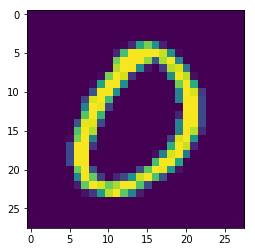

In [70]:
plt.imshow(img[1,0,:,:])

In [71]:
print(label.shape)

torch.Size([96])


In [72]:
print(label.numpy()[1])

0


In [88]:
class NumberDetector(nn.Module):
    def __init__(self,N_h):
        super(NumberDetector,self).__init__()
        
        self.input_to_hidden = nn.Linear(28*28,N_h)
        self.hidden_to_output = nn.Linear(N_h,10)
        
    def forward(self,x):
        x = x.view(-1,784)
        x = self.input_to_hidden(x)
        x = nn.functional.relu(x)
        x = self.hidden_to_output(x)
        x = nn.functional.relu(x)
        
        return x

In [89]:
model = NumberDetector(N_h=100)

In [90]:
parameters = model.parameters()

In [91]:
w = model.input_to_hidden.weight.detach().numpy().shape
b = model.input_to_hidden.bias.detach().numpy().shape
print('Weight shape: {}, Bias shape: {}'.format(w,b))

Weight shape: (100, 784), Bias shape: (100,)


In [92]:
model.input_to_hidden.weight

Parameter containing:
tensor([[ 0.0126,  0.0321,  0.0289,  ...,  0.0264, -0.0316,  0.0356],
        [-0.0005,  0.0181,  0.0048,  ..., -0.0338,  0.0230, -0.0241],
        [ 0.0065,  0.0137, -0.0085,  ..., -0.0275,  0.0129, -0.0129],
        ...,
        [ 0.0025, -0.0125, -0.0275,  ..., -0.0088,  0.0327, -0.0126],
        [-0.0190,  0.0265,  0.0046,  ...,  0.0031,  0.0186,  0.0170],
        [ 0.0079,  0.0208, -0.0202,  ..., -0.0027, -0.0076,  0.0200]],
       requires_grad=True)

In [93]:
loss_fn = torch.nn.CrossEntropyLoss()

In [96]:
# Change in loss as a function of change in model params (i.e. weights)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [98]:
model = model.to(device)
for epoch in range(200):
    print('Epoch ' + str(epoch))
    for img, label in train_data_loader:
        
        img = img.to(device)
        label = label.to(device)

        # Forward pass of inputs to outputs
        out = model(img)
       
        # Calculate loss
        loss = loss_fn(out,label)
        
        # Clear all the gradients
        optimizer.zero_grad()

        # Calculate new gradients
        loss.backward()
        
        # Take a step down the gradient
        optimizer.step()
        
        # Calculation
        _,idx = out.max(dim=-1)
        num_correct = 0
        for i in range(idx.shape[0]):
            if idx[i] == label[i]:
                num_correct += 1
        print(str(num_correct) + ' / ' + str(idx.shape[0]))
        print(num_correct / idx.shape[0])

Epoch 0
182 / 256
0.7109375
178 / 256
0.6953125
173 / 256
0.67578125
180 / 256
0.703125
169 / 256
0.66015625
182 / 256
0.7109375
170 / 256
0.6640625
170 / 256
0.6640625
182 / 256
0.7109375
185 / 256
0.72265625
160 / 256
0.625
174 / 256
0.6796875
157 / 256
0.61328125
185 / 256
0.72265625
178 / 256
0.6953125
178 / 256
0.6953125
175 / 256
0.68359375
176 / 256
0.6875
176 / 256
0.6875
174 / 256
0.6796875
180 / 256
0.703125
177 / 256
0.69140625
177 / 256
0.69140625
187 / 256
0.73046875
176 / 256
0.6875
176 / 256
0.6875
180 / 256
0.703125
154 / 256
0.6015625
177 / 256
0.69140625
171 / 256
0.66796875
188 / 256
0.734375
173 / 256
0.67578125
180 / 256
0.703125
169 / 256
0.66015625
165 / 256
0.64453125
182 / 256
0.7109375
181 / 256
0.70703125
168 / 256
0.65625
171 / 256
0.66796875
173 / 256
0.67578125
182 / 256
0.7109375
161 / 256
0.62890625
179 / 256
0.69921875
163 / 256
0.63671875
182 / 256
0.7109375
172 / 256
0.671875
174 / 256
0.6796875
175 / 256
0.68359375
182 / 256
0.7109375
159 / 256
0.621

In [83]:
model.input_to_hidden

Linear(in_features=784, out_features=100, bias=True)